In [2]:
require(data.table)
require(dplyr)
require(tidyverse)
require(dada2)
require(phyloseq)
require(genefilter)
require(ggplot2)
require(vegan)
require(RColorBrewer)
require(metacoder)
options(repr.plot.width=20, repr.plot.height=15)

Loading required package: data.table

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   4.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()     masks data.table::between()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::first()       masks data.table::first()
✖ lubridate::hour()    masks data.table::hour()
✖ lubridate::isoweek() masks data.table::isoweek()
✖ dplyr::lag()         masks stats::l

instead do rds files of otu?

In [3]:
ps<-readRDS(file = "/work/pi_sarah_gignouxwolfsohn_uml_edu/caroline/RDS/ps.rds")

In [4]:
#removing any taxa that don't show up in any samples to speed up the process
ps <- prune_taxa(taxa_sums(ps) > 0, ps)

In [5]:
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 93551 taxa and 57 samples ]
sample_data() Sample Data:       [ 57 samples by 95313 sample variables ]
tax_table()   Taxonomy Table:    [ 93551 taxa by 6 taxonomic ranks ]

In [6]:
#normalizing ps by converting rawcounts into relative abundances
#so samples with more reads wont be over represented
#using ps bc only to the count data (OTU table), while preserving the rest of the object
ps_norm = transform_sample_counts(ps, function(x) 1E6 * x / sum(x))

In [7]:
ps_norm

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 93551 taxa and 57 samples ]
sample_data() Sample Data:       [ 57 samples by 95313 sample variables ]
tax_table()   Taxonomy Table:    [ 93551 taxa by 6 taxonomic ranks ]

In [9]:
ps_norm_euk=subset_taxa(ps_norm, Kingdom=="Eukaryota")

In [10]:
ps_norm_euk

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 6543 taxa and 57 samples ]
sample_data() Sample Data:       [ 57 samples by 95313 sample variables ]
tax_table()   Taxonomy Table:    [ 6543 taxa by 6 taxonomic ranks ]

In [13]:
ps_norm_bac=subset_taxa(ps_norm, Kingdom=="Bacteria")

In [14]:
ps_norm_bac

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 82630 taxa and 57 samples ]
sample_data() Sample Data:       [ 57 samples by 95313 sample variables ]
tax_table()   Taxonomy Table:    [ 82630 taxa by 6 taxonomic ranks ]

In [25]:
ps_norm_nochlo=subset_taxa(ps_norm_bac, Order!="Chloroplast")

In [26]:
ps_norm_nochlo

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 60624 taxa and 57 samples ]
sample_data() Sample Data:       [ 57 samples by 95313 sample variables ]
tax_table()   Taxonomy Table:    [ 60624 taxa by 6 taxonomic ranks ]

# is renaming the ASV to shorten the name from seq necessary?
dna df holds original dna seqneces as column names

In [6]:
#renaming the taxa to a short string while maintaining full dna seq in the background
dna <- Biostrings::DNAStringSet(taxa_names(ps_norm))
names(dna) <- taxa_names(ps_norm)
ps_norm <- merge_phyloseq(ps_norm, dna)
taxa_names(ps_norm) <- paste0("ASV", seq(ntaxa(ps_norm)))
ps_norm

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 93551 taxa and 57 samples ]
sample_data() Sample Data:       [ 57 samples by 95313 sample variables ]
tax_table()   Taxonomy Table:    [ 93551 taxa by 6 taxonomic ranks ]
refseq()      DNAStringSet:      [ 93551 reference sequences ]

In [7]:
#remember to set.seed to make things reproducible
set.seed(99) 

In [8]:
theme_set(theme_bw())

# NMDS ordination removing order chloroplast with phyloseq
interesting SSIDs are not clustering at all

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1317897 
Run 1 stress 0.1228751 
... New best solution
... Procrustes: rmse 0.05318398  max resid 0.2568173 
Run 2 stress 0.1121297 
... New best solution
... Procrustes: rmse 0.03385859  max resid 0.1500872 
Run 3 stress 0.1277412 
Run 4 stress 0.1217228 
Run 5 stress 0.1186683 
Run 6 stress 0.1144805 
Run 7 stress 0.1121297 
... Procrustes: rmse 5.791869e-06  max resid 3.703573e-05 
... Similar to previous best
Run 8 stress 0.1157894 
Run 9 stress 0.1127561 
Run 10 stress 0.1327721 
Run 11 stress 0.118568 
Run 12 stress 0.1327721 
Run 13 stress 0.1199954 
Run 14 stress 0.1362651 
Run 15 stress 0.1352246 
Run 16 stress 0.1309709 
Run 17 stress 0.1312164 
Run 18 stress 0.1343617 
Run 19 stress 0.1278324 
Run 20 stress 0.1127561 
*** Best solution repeated 1 times


Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”


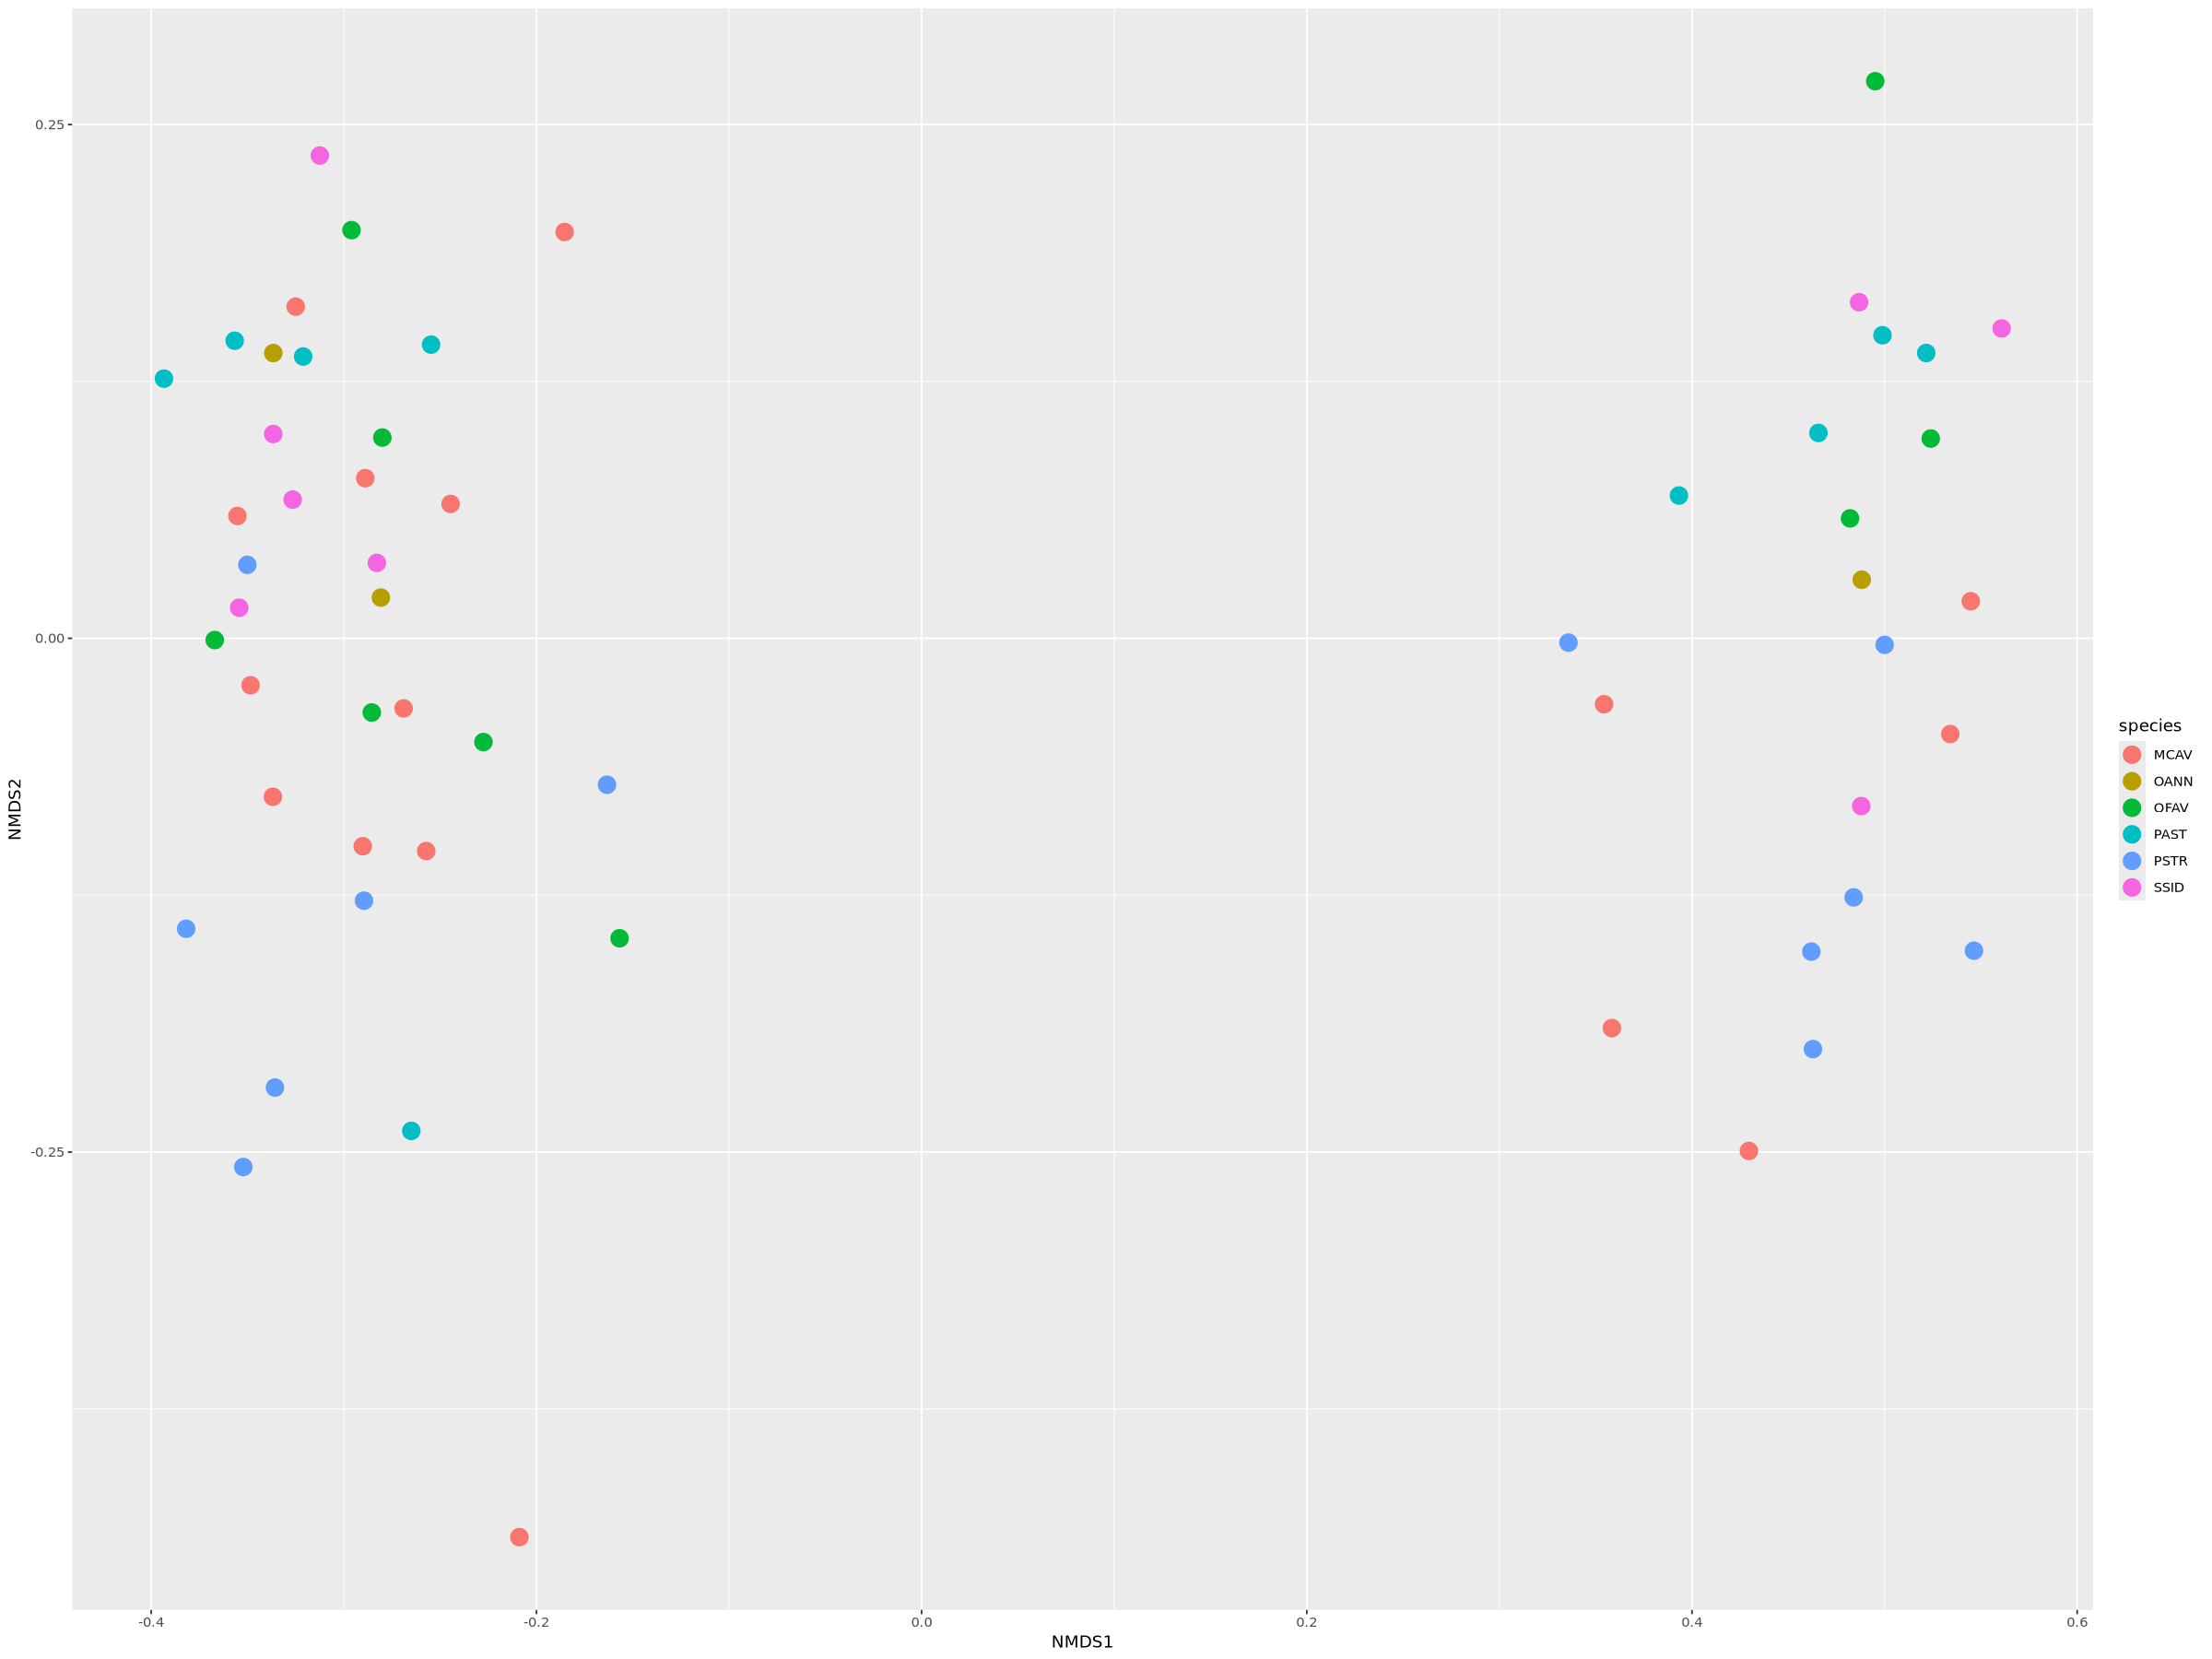

In [29]:
ps_norm.ord <- ordinate(ps_norm_nochlo, "NMDS", "bray", trymax=1000)
plot_ordination(ps_norm_nochlo, ps_norm.ord, type="samples", color="species")+ 
geom_point(size=5)

# Creating NMDS ordination
- Stress values >0.2 are generally poor and potentially uninterpretable, whereas values <0.1 are good and <0.05 are excellent, leaving little danger of misinterpretation. Stress values between 0.1 and 0.2 are useable but some of the distances will be misleading. 

clustering on the x axis 
# find what is driving nmds 1
- the most variance is explained by the first component eigenval
PCA analysis arrows with the length and direction

- use metaMDS() in vegan to create a nmds plot that is automatically stable and not trapped in local optima

- metaMDS() in vegan automatically rotates the final result of the NMDS using PCA to make axis 1 correspond to the greatest variance among the NMDS sample points

# vegan time!
converting ps_norm to a usable state in vegan bc vegan can't read phyloseq objects, can only read separate df and matrices

ALSO can't head() a phyloseq object 

In [9]:
# convert the sample_data() within a phyloseq object to a vegan compatible data object
pssd2veg <- function(ps_norm) {
  sd_veg <- sample_data(ps_norm)
  return(as(sd_veg,"data.frame"))
}

# convert the otu_table() within a phyloseq object to a vegan compatible data object
psotu2veg <- function(ps_norm) {
  otu_veg <- otu_table(ps_norm)
  if (taxa_are_rows(otu_veg)) {
    otu_veg <- t(otu_veg)
  }
  return(as(otu_veg, "matrix"))
}

In [10]:
# Extract normalized OTU matrix and sample data
otu_norm <- psotu2veg(ps_norm)
sample_norm <- pssd2veg(ps_norm)

In [ ]:
# convert the sample_data() within a phyloseq object to a vegan compatible data object
pssd2veg <- function(ps_norm_nochlo) {
  sd_nochlo <- sample_data(ps_norm_nochlo)
  return(as(sd_nochlo,"data.frame"))
}

#using phyloseq nmds plot no chloroplast
sample_nochlo <- pssd2veg(ps_norm_nochlo)

#vector fitting using a regression
# The function envfit will add the environmental variables as vectors to the ordination plot
ef <- envfit(ps_norm.ord, sample_nochlo, permu = 999)
ef

In [ ]:
#vector fitting using a regression
# The function envfit will add the environmental variables as vectors to the ordination plot
ef <- envfit(ps_norm.ord, sample_norm, permu = 999)
ef

In [11]:
class(otu_norm)

[1] "matrix" "array"

In [12]:
#cleaning sample_norm
# Rename a single column
sample_16Sdoubl <- sample_norm %>%
  rename(double_band = X16S.double.band)
#cleaning up sample_norm to only be metadata
sample_norm <- sample_16Sdoubl[, c("Health_Status", "colony", "Date_16S", "double_band", "date", "transect", "species")]

In [13]:
head(otu_norm)
head(sample_norm)

,ASV1,ASV2,ASV3,ASV4,ASV5,ASV6,ASV7,ASV8,ASV9,ASV10,⋯,ASV93542,ASV93543,ASV93544,ASV93545,ASV93546,ASV93547,ASV93548,ASV93549,ASV93550,ASV93551
012024_BEL_CBC_T1_557_SSID,4491.9455,0.00000,37027.5713,0.0000,464.6840,371.7472,3237.299,247.8315,2842.3172,0.0000,⋯,0,0,0,0,0,0,0,0,0,0
012024_BEL_CBC_T1_563_PSTR,0.0000,0.00000,0.0000,179.4285,0.0000,0.0000,0.000,0.0000,0.0000,762.5712,⋯,0,0,0,0,0,0,0,0,0,0
012024_BEL_CBC_T2_601_OFAV,1609.1636,34.60567,13386.6261,0.0000,686.3458,0.0000,37460.636,0.0000,3131.8130,0.0000,⋯,0,0,0,0,0,0,0,0,0,0
012024_BEL_CBC_T3_631_MCAV,810.0285,0.00000,288.9431,0.0000,0.0000,111.1320,433318.351,0.0000,298.8215,0.0000,⋯,0,0,0,0,0,0,0,0,0,0
012024_BEL_CBC_T3_633_MCAV,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.000,271.3228,0.0000,0.0000,⋯,0,0,0,0,0,0,0,0,0,0
012024_BEL_CBC_T3_637_SSID,0.0000,7183.34362,0.0000,4040.6308,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,⋯,0,0,0,0,0,0,0,0,0,0


,Health_Status,colony,Date_16S,double_band,date,transect,species
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
012024_BEL_CBC_T1_557_SSID,Healthy,1_3,3_4_2025,y,012024,T1,SSID
012024_BEL_CBC_T1_563_PSTR,Healthy,1_12,3_6_2025,,012024,T1,PSTR
012024_BEL_CBC_T2_601_OFAV,Healthy,2_79,3_4_2025,,012024,T2,OFAV
012024_BEL_CBC_T3_631_MCAV,Healthy,3_21,3_4_2025,,012024,T3,MCAV
012024_BEL_CBC_T3_633_MCAV,Healthy,3_2,3_6_2025,,012024,T3,MCAV
012024_BEL_CBC_T3_637_SSID,Healthy,3_5,3_6_2025,,012024,T3,SSID


I am happy I looked at sample_norm bc what is this, maybe I don't want to change the sequences to ASV1..?
also i might have made a mistake when I filtered for 10K reads bc it seems like I merged track_clean into samdf

In [14]:
# Should return TRUE
all(rownames(sample_norm) == rownames(otu_norm))

[1] TRUE

# NMDS Ordination with vegan

In [15]:
set.seed(12)

# using standard metaMDS (sqrt+wisconsin) because my data has not been transformed 
I want to balance influence between rare species and dominant species

use NMDS2 isntead of NMDS1 <- metaMDS(dist, k = 2, trymax = 100, trace = F)
because lower stress level and results Repeated 5 times in 20 tries

In [16]:
#after plotting # dimensions vs stress I see that my values are all <0.2 so is it okay (not the best for perfect interp)
#using k=2 bc I want to make a 2-D plot

# If you don`t provide a dissimilarity matrix, metaMDS automatically applies Bray-Curtis. So in our case, the results would have to be the same
NMDS2 <- metaMDS(otu_norm, k = 2, trymax = 100, trace = F)
NMDS2

Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”



Call:
metaMDS(comm = otu_norm, k = 2, trymax = 100, trace = F) 

global Multidimensional Scaling using monoMDS

Data:     wisconsin(sqrt(otu_norm)) 
Distance: bray 

Dimensions: 2 
Stress:     0.1154917 
Stress type 1, weak ties
Best solution was repeated 3 times in 20 tries
The best solution was from try 6 (random start)
Scaling: centring, PC rotation 
Species: expanded scores based on ‘wisconsin(sqrt(otu_norm))’ 


# now use sample data to see what is driving the observed differences

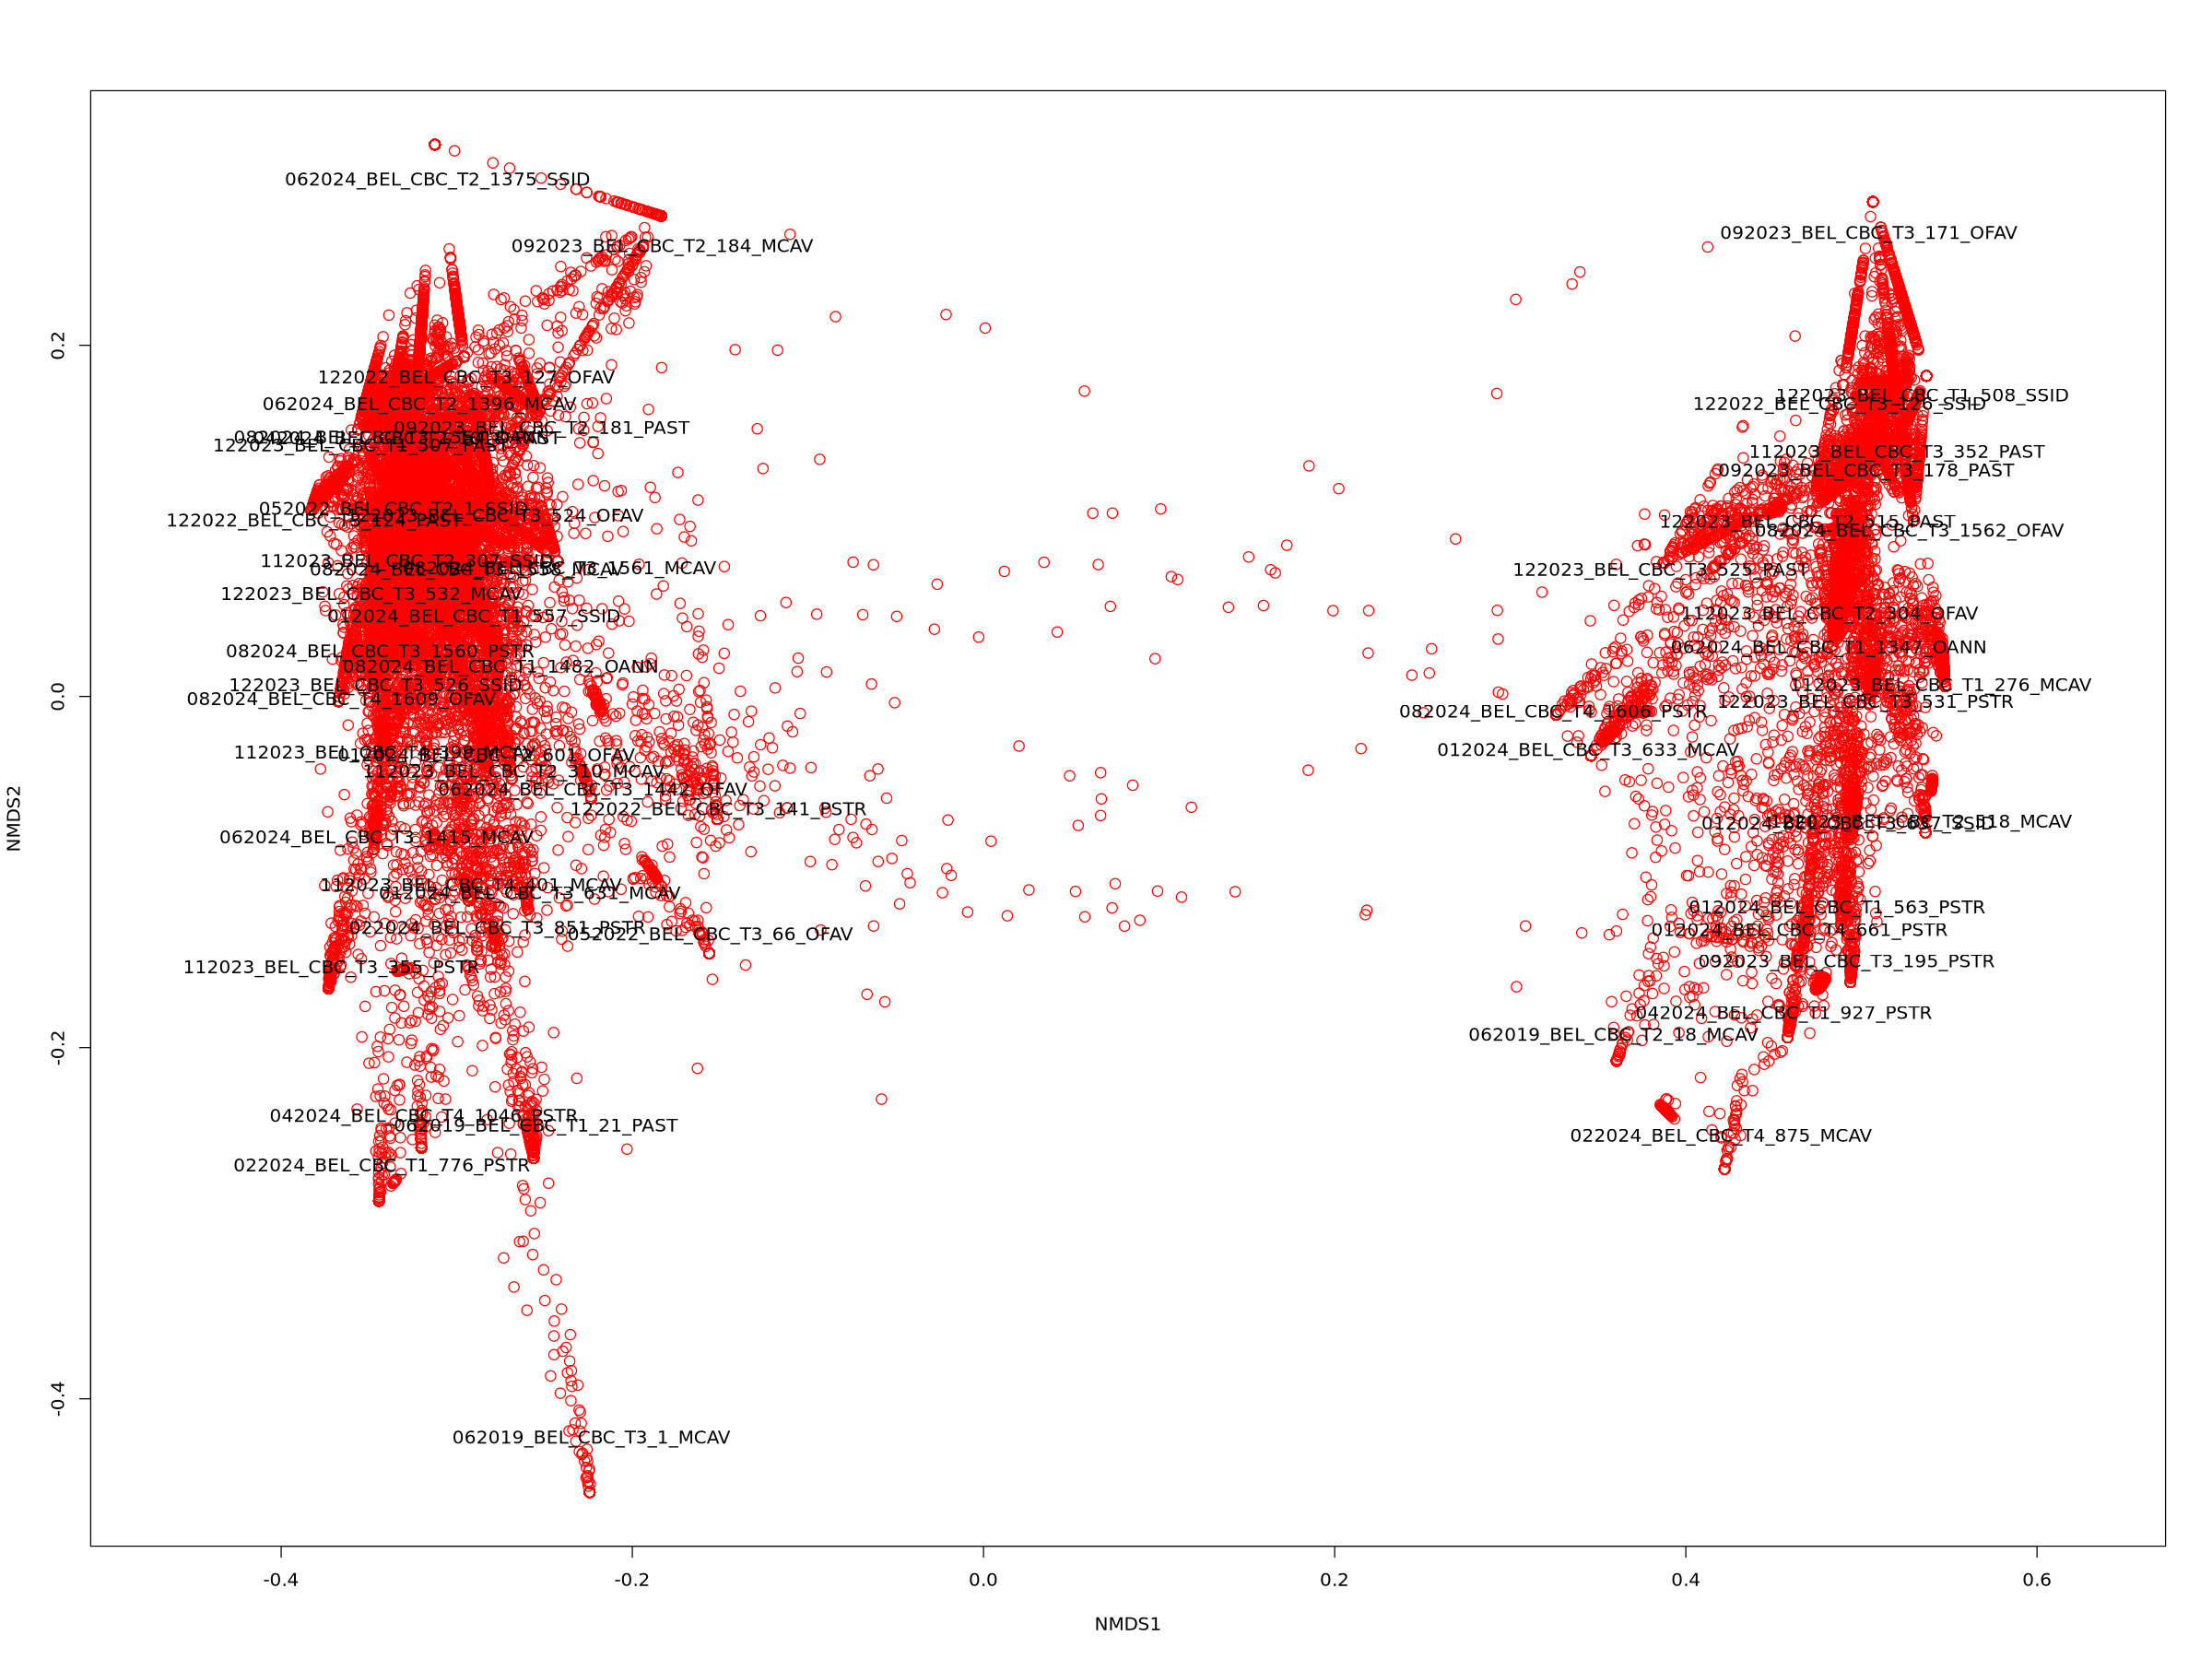

In [17]:
plot(NMDS2, display = "species", type = "n")
points(NMDS2, display = "species", col = "red", cex = 1.25)
text(NMDS2, display ="sites")

In [18]:
# Check matching sample order
all(rownames(NMDS2$points) == rownames(sample_norm))  # Should be TRUE

[1] TRUE


***FACTORS:

Centroids:
                               NMDS1   NMDS2
Health_StatusDiseased_Tissue -0.3457 -0.0813
Health_StatusHealthy          0.0062  0.0015
colony1_12                    0.1998 -0.1902
colony1_21                   -0.3048 -0.0517
colony1_24                    0.5452  0.0054
colony1_25                    0.1032  0.0215
colony1_3                     0.1221  0.1075
colony2_55                    0.1333 -0.0580
colony2_57                   -0.3284  0.1461
colony2_60                   -0.1828  0.2555
colony2_63                   -0.2518  0.1519
colony2_68                    0.4692  0.0985
colony2_69                    0.0189 -0.0142
colony2_73                   -0.3236  0.1996
colony2_76                    0.4819  0.0462
colony2_79                   -0.2831 -0.0346
colony2_99                   -0.3285  0.0761
colony3_10                    0.5201  0.1382
colony3_14                   -0.2942  0.0713
colony3_2                    -0.0748 -0.1786
colony3_20                   -

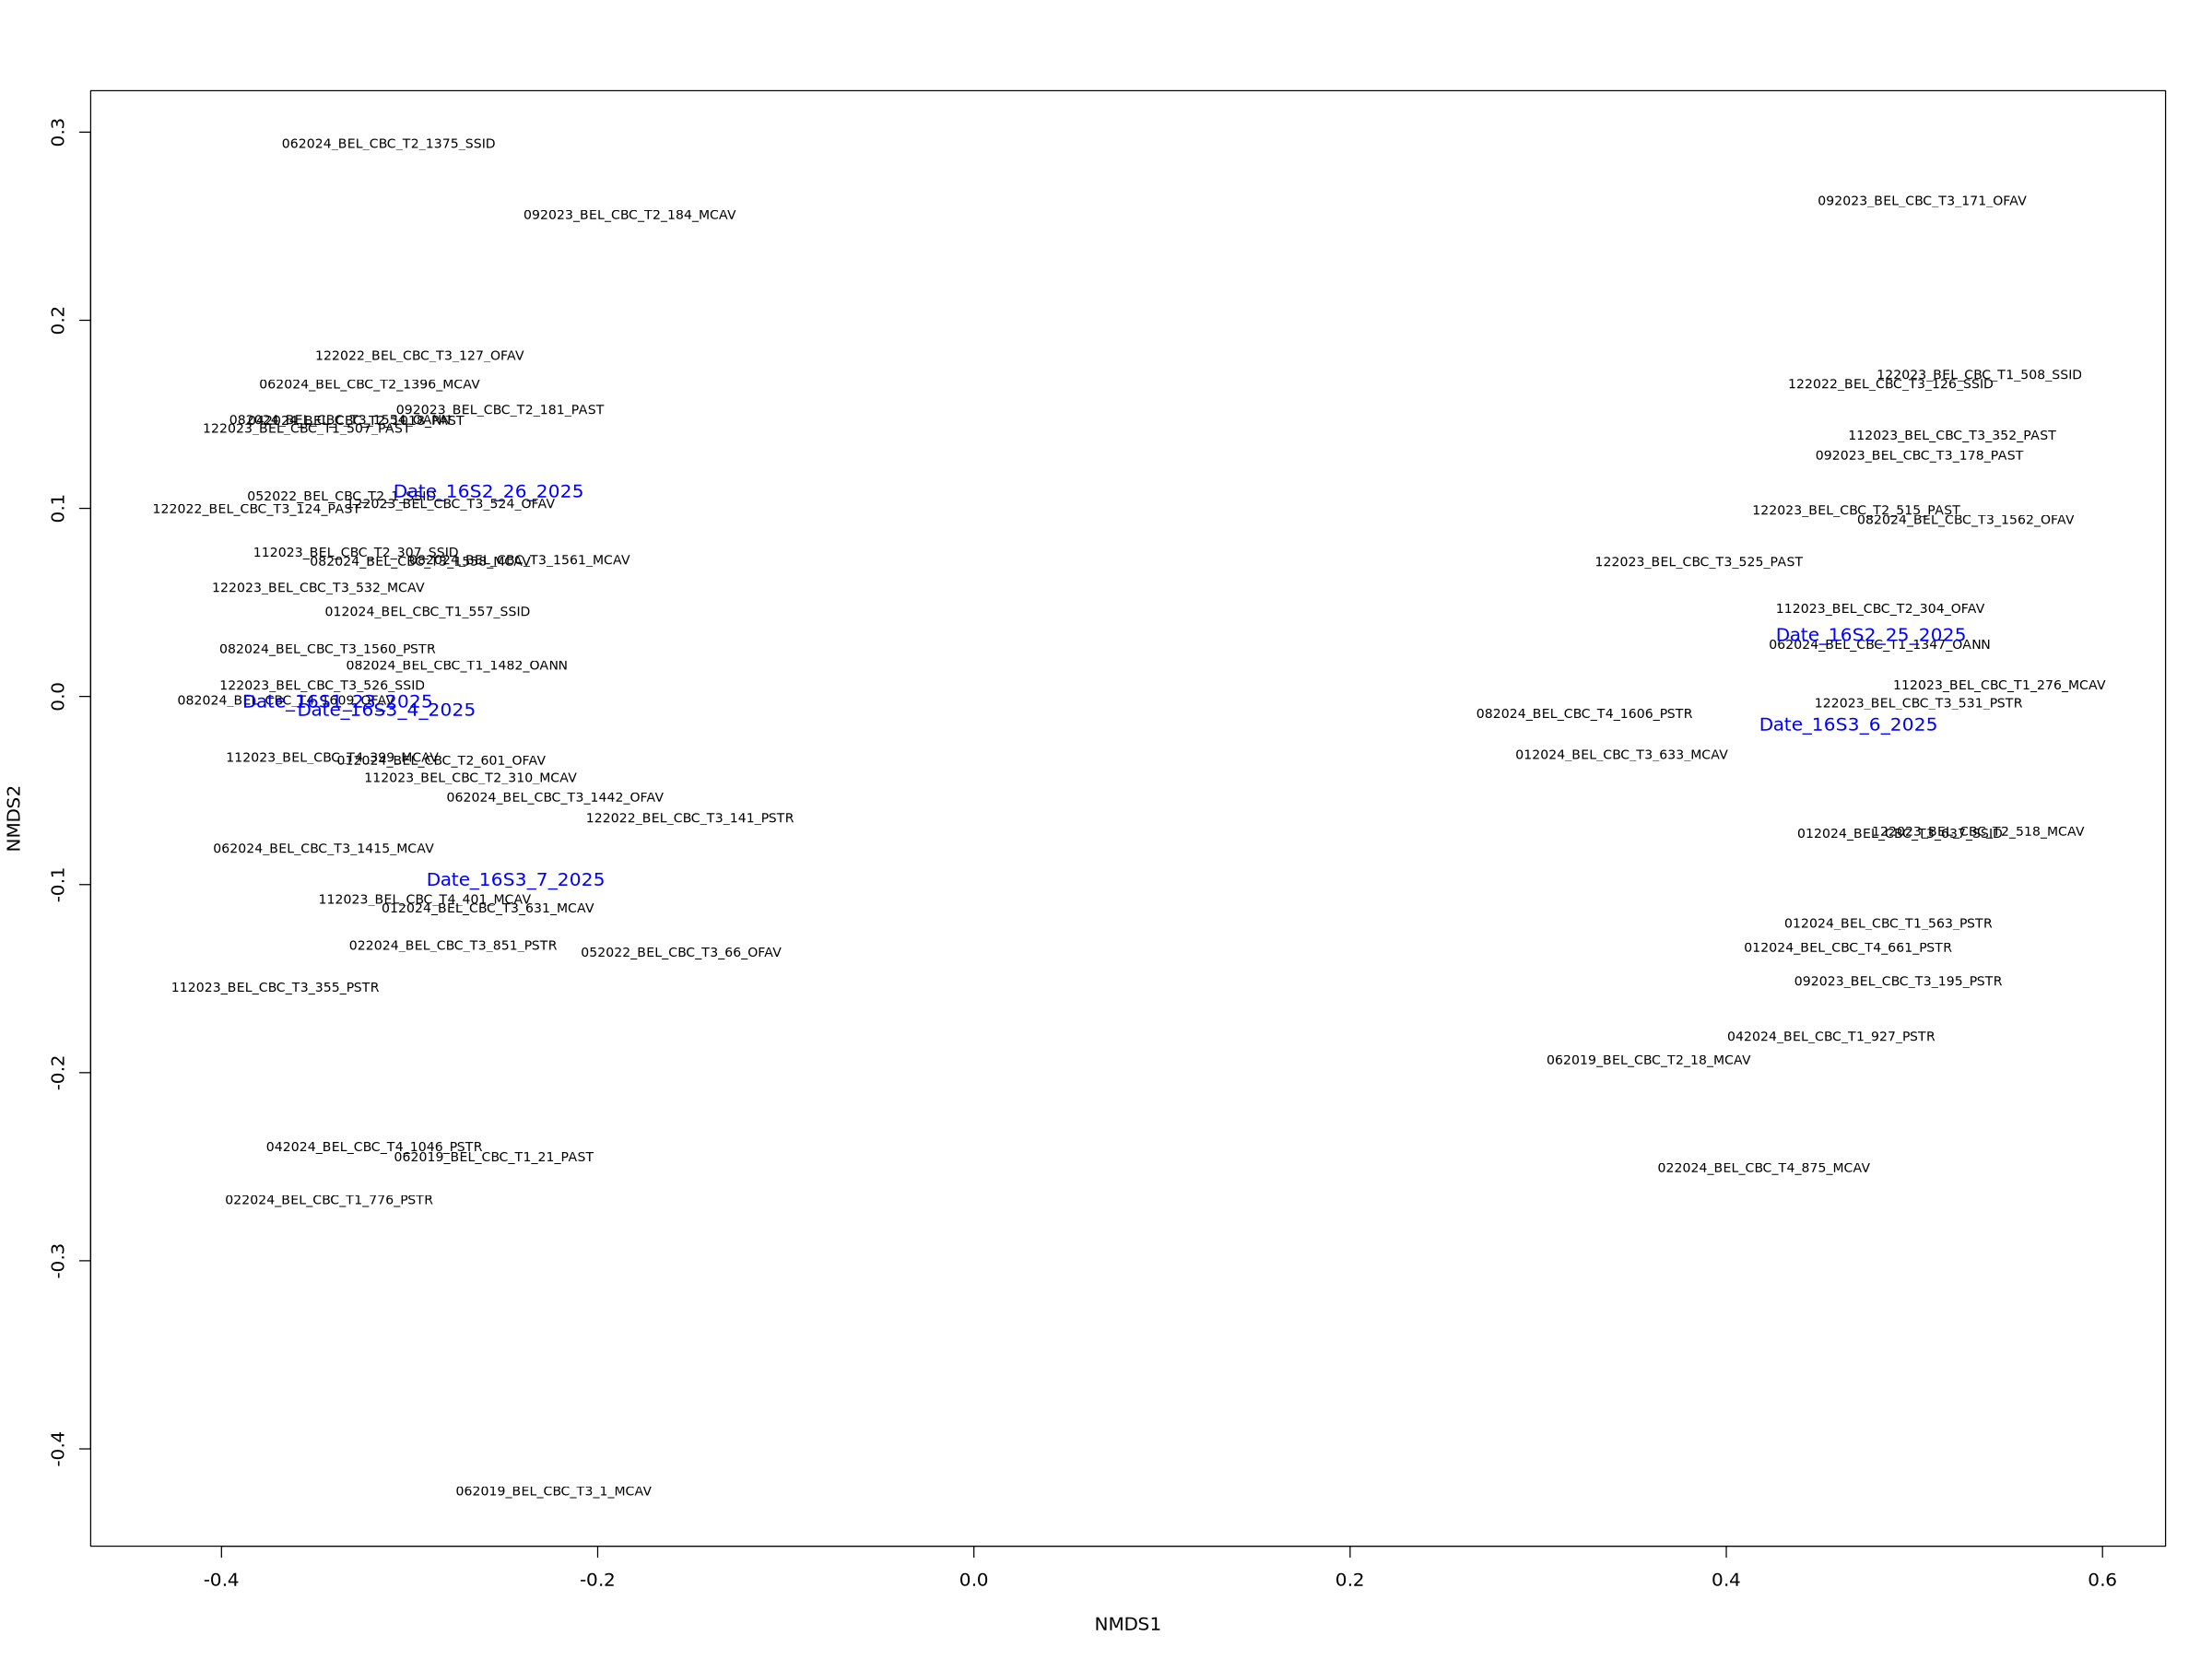

In [19]:
#vector fitting using a regression
# The function envfit will add the environmental variables as vectors to the ordination plot
ef <- envfit(NMDS2, sample_norm, permu = 999)
ef

# The two last columns are of interest: the squared correlation coefficient and the associated p-value
# Plot the vectors of the significant correlations and interpret the plot
plot(NMDS2, type = "t", display = "sites")
plot(ef, p.max = 0.05)

# Principle Component Analysis bi plots using vegan
- to help me visualize NMDS plots in a different way, uncover what is clustering on the X-axis

- plots PCA 1 and 2 along axes that are the variable, therefore is PCA1 is closer to species it is more impacted by species differences
- the first axis has the highest eigenvalue and thus explains the most variance

- The eigenvalues represent the variance extracted by each PC, and are often expressed as a percentage of the sum of all eigenvalues (i.e. total variance). 

In [20]:
set.seed(222)

In [21]:
#build PCA ord
PCA <- rda(otu_norm, scale = FALSE)

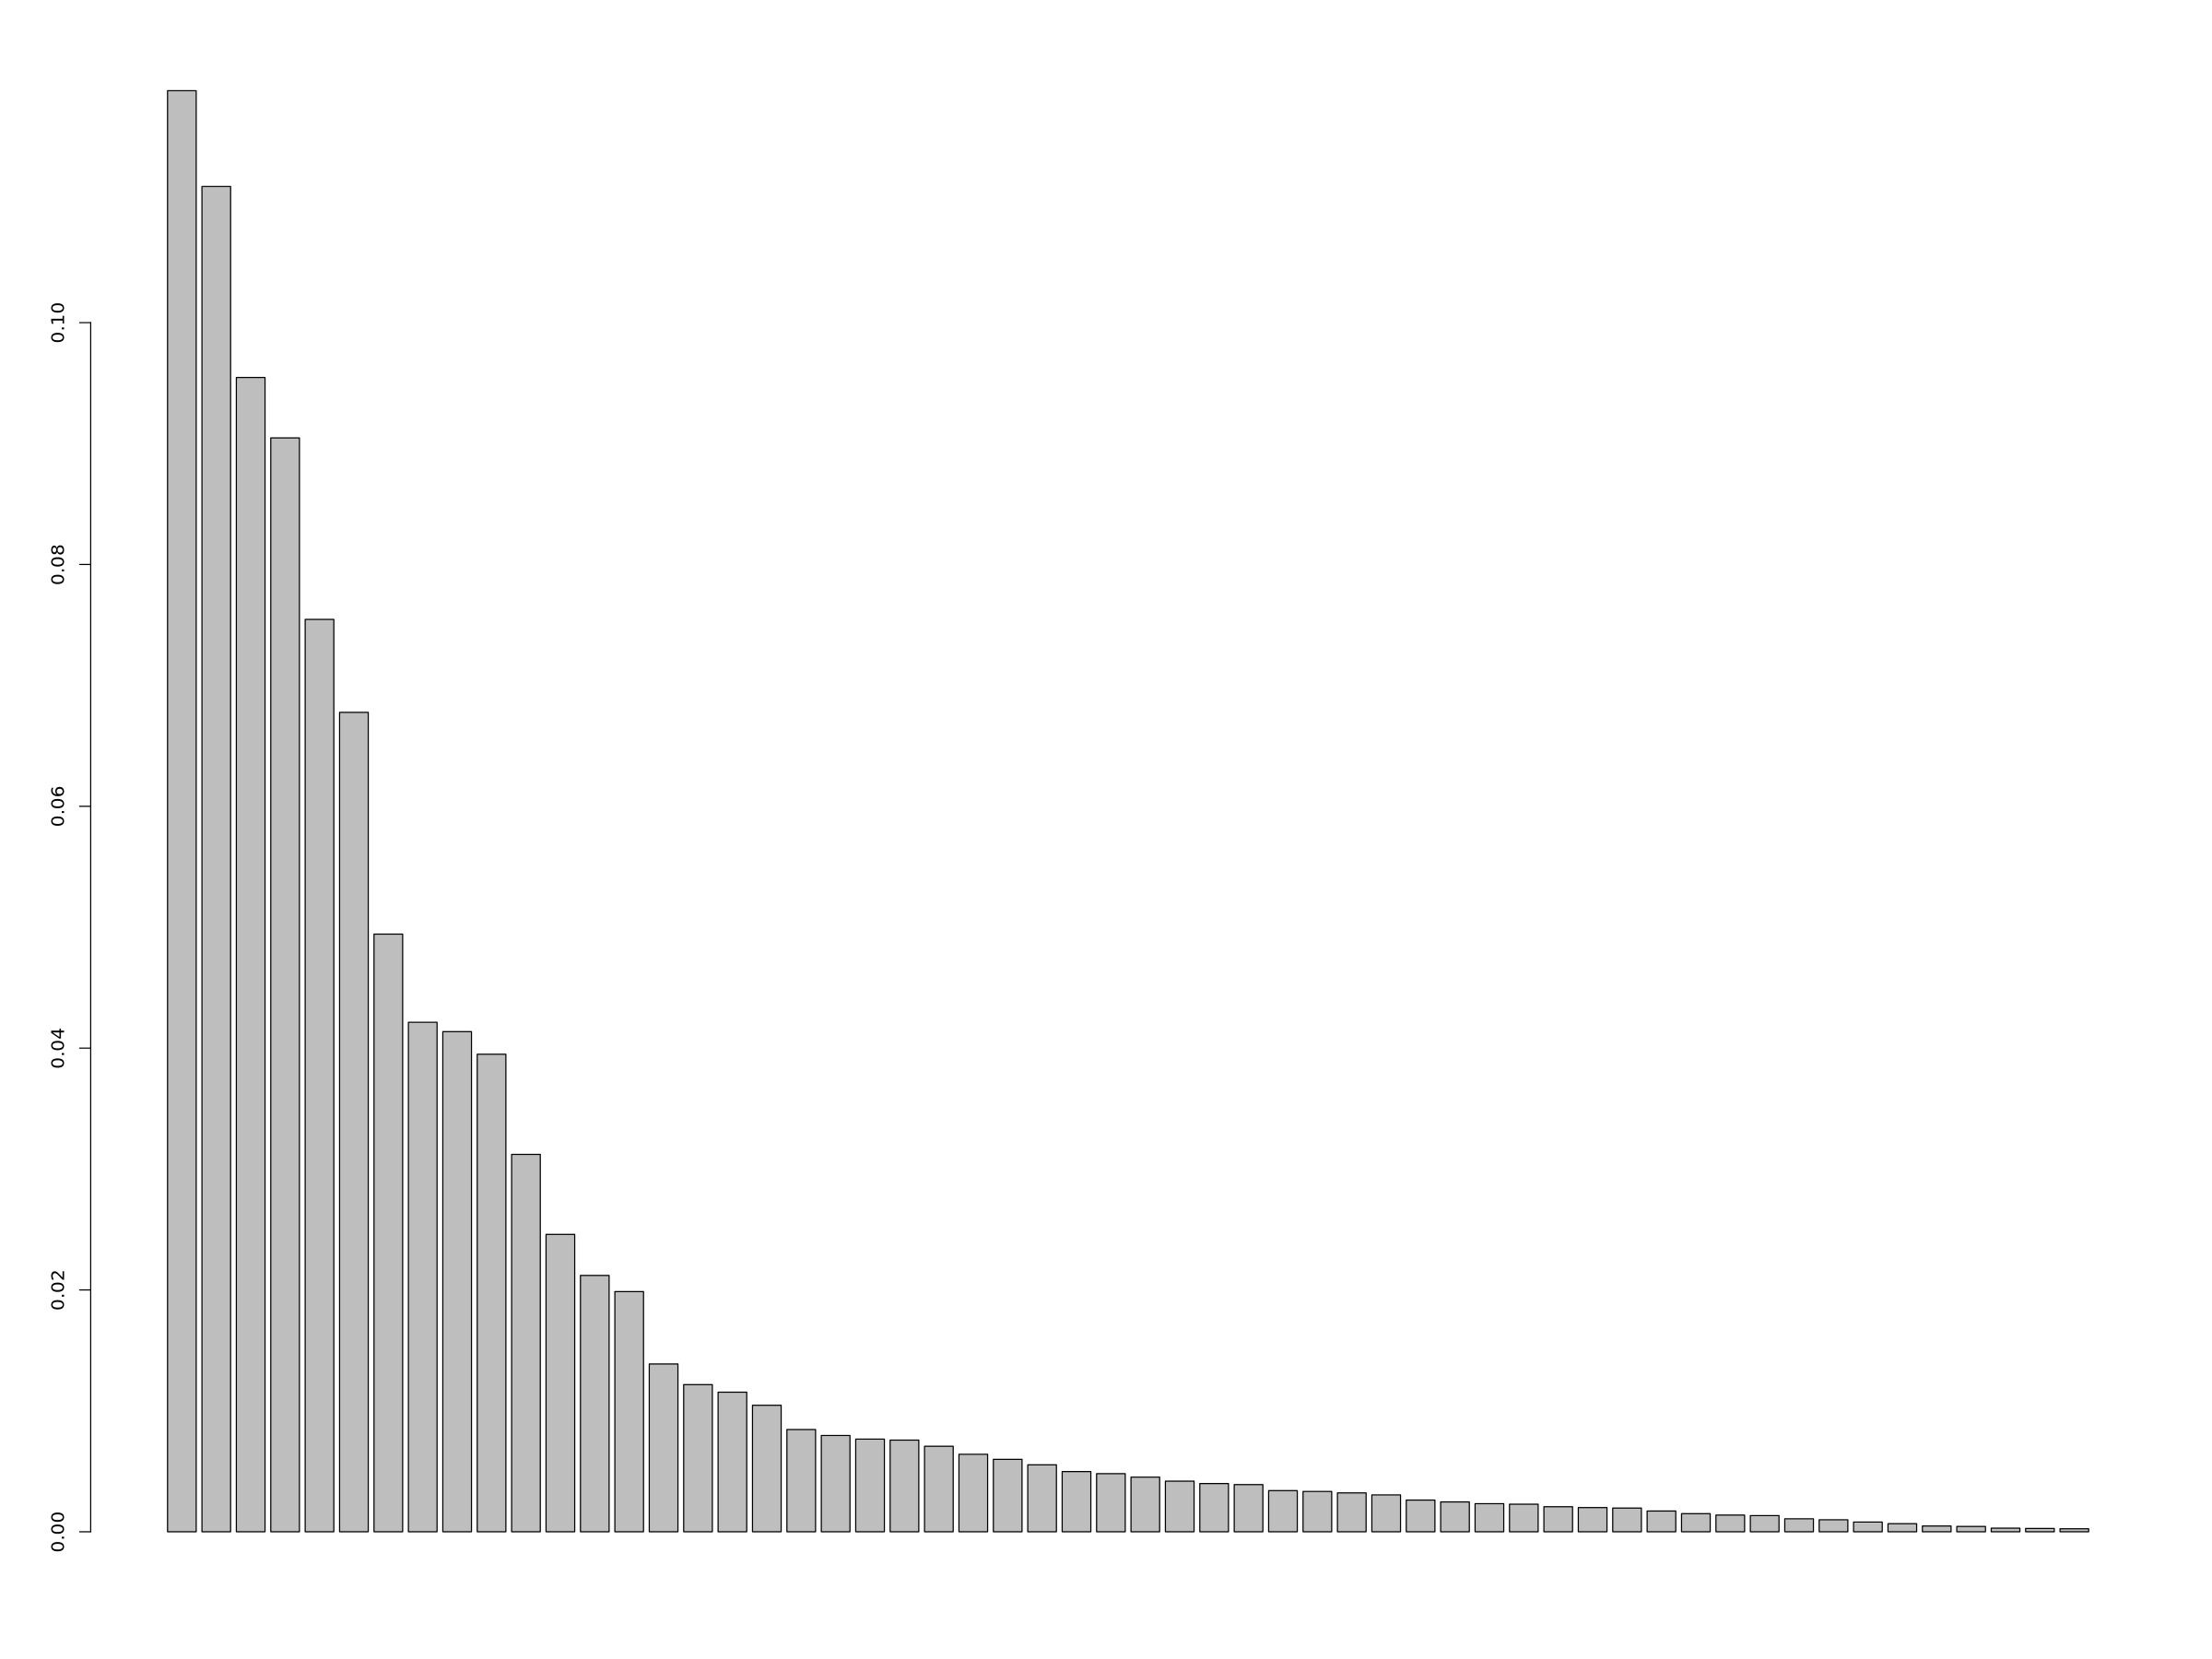

In [22]:
# Now plot a bar plot of relative eigenvalues. This is the percentage variance explained by each axis
barplot(as.vector(PCA$CA$eig)/sum(PCA$CA$eig)) 
# How much of the variance in our dataset is explained by the first principal component?

pca plots

In [23]:
# Calculate the percent of variance explained by first two axes
sum((as.vector(PCA$CA$eig)/sum(PCA$CA$eig))[1:2]) 
# hmmm I do not like that the first two axes only explain 23% of variance
sum((as.vector(PCA$CA$eig)/sum(PCA$CA$eig))[1:6]) 

[1] 0.2304434

[1] 0.559599

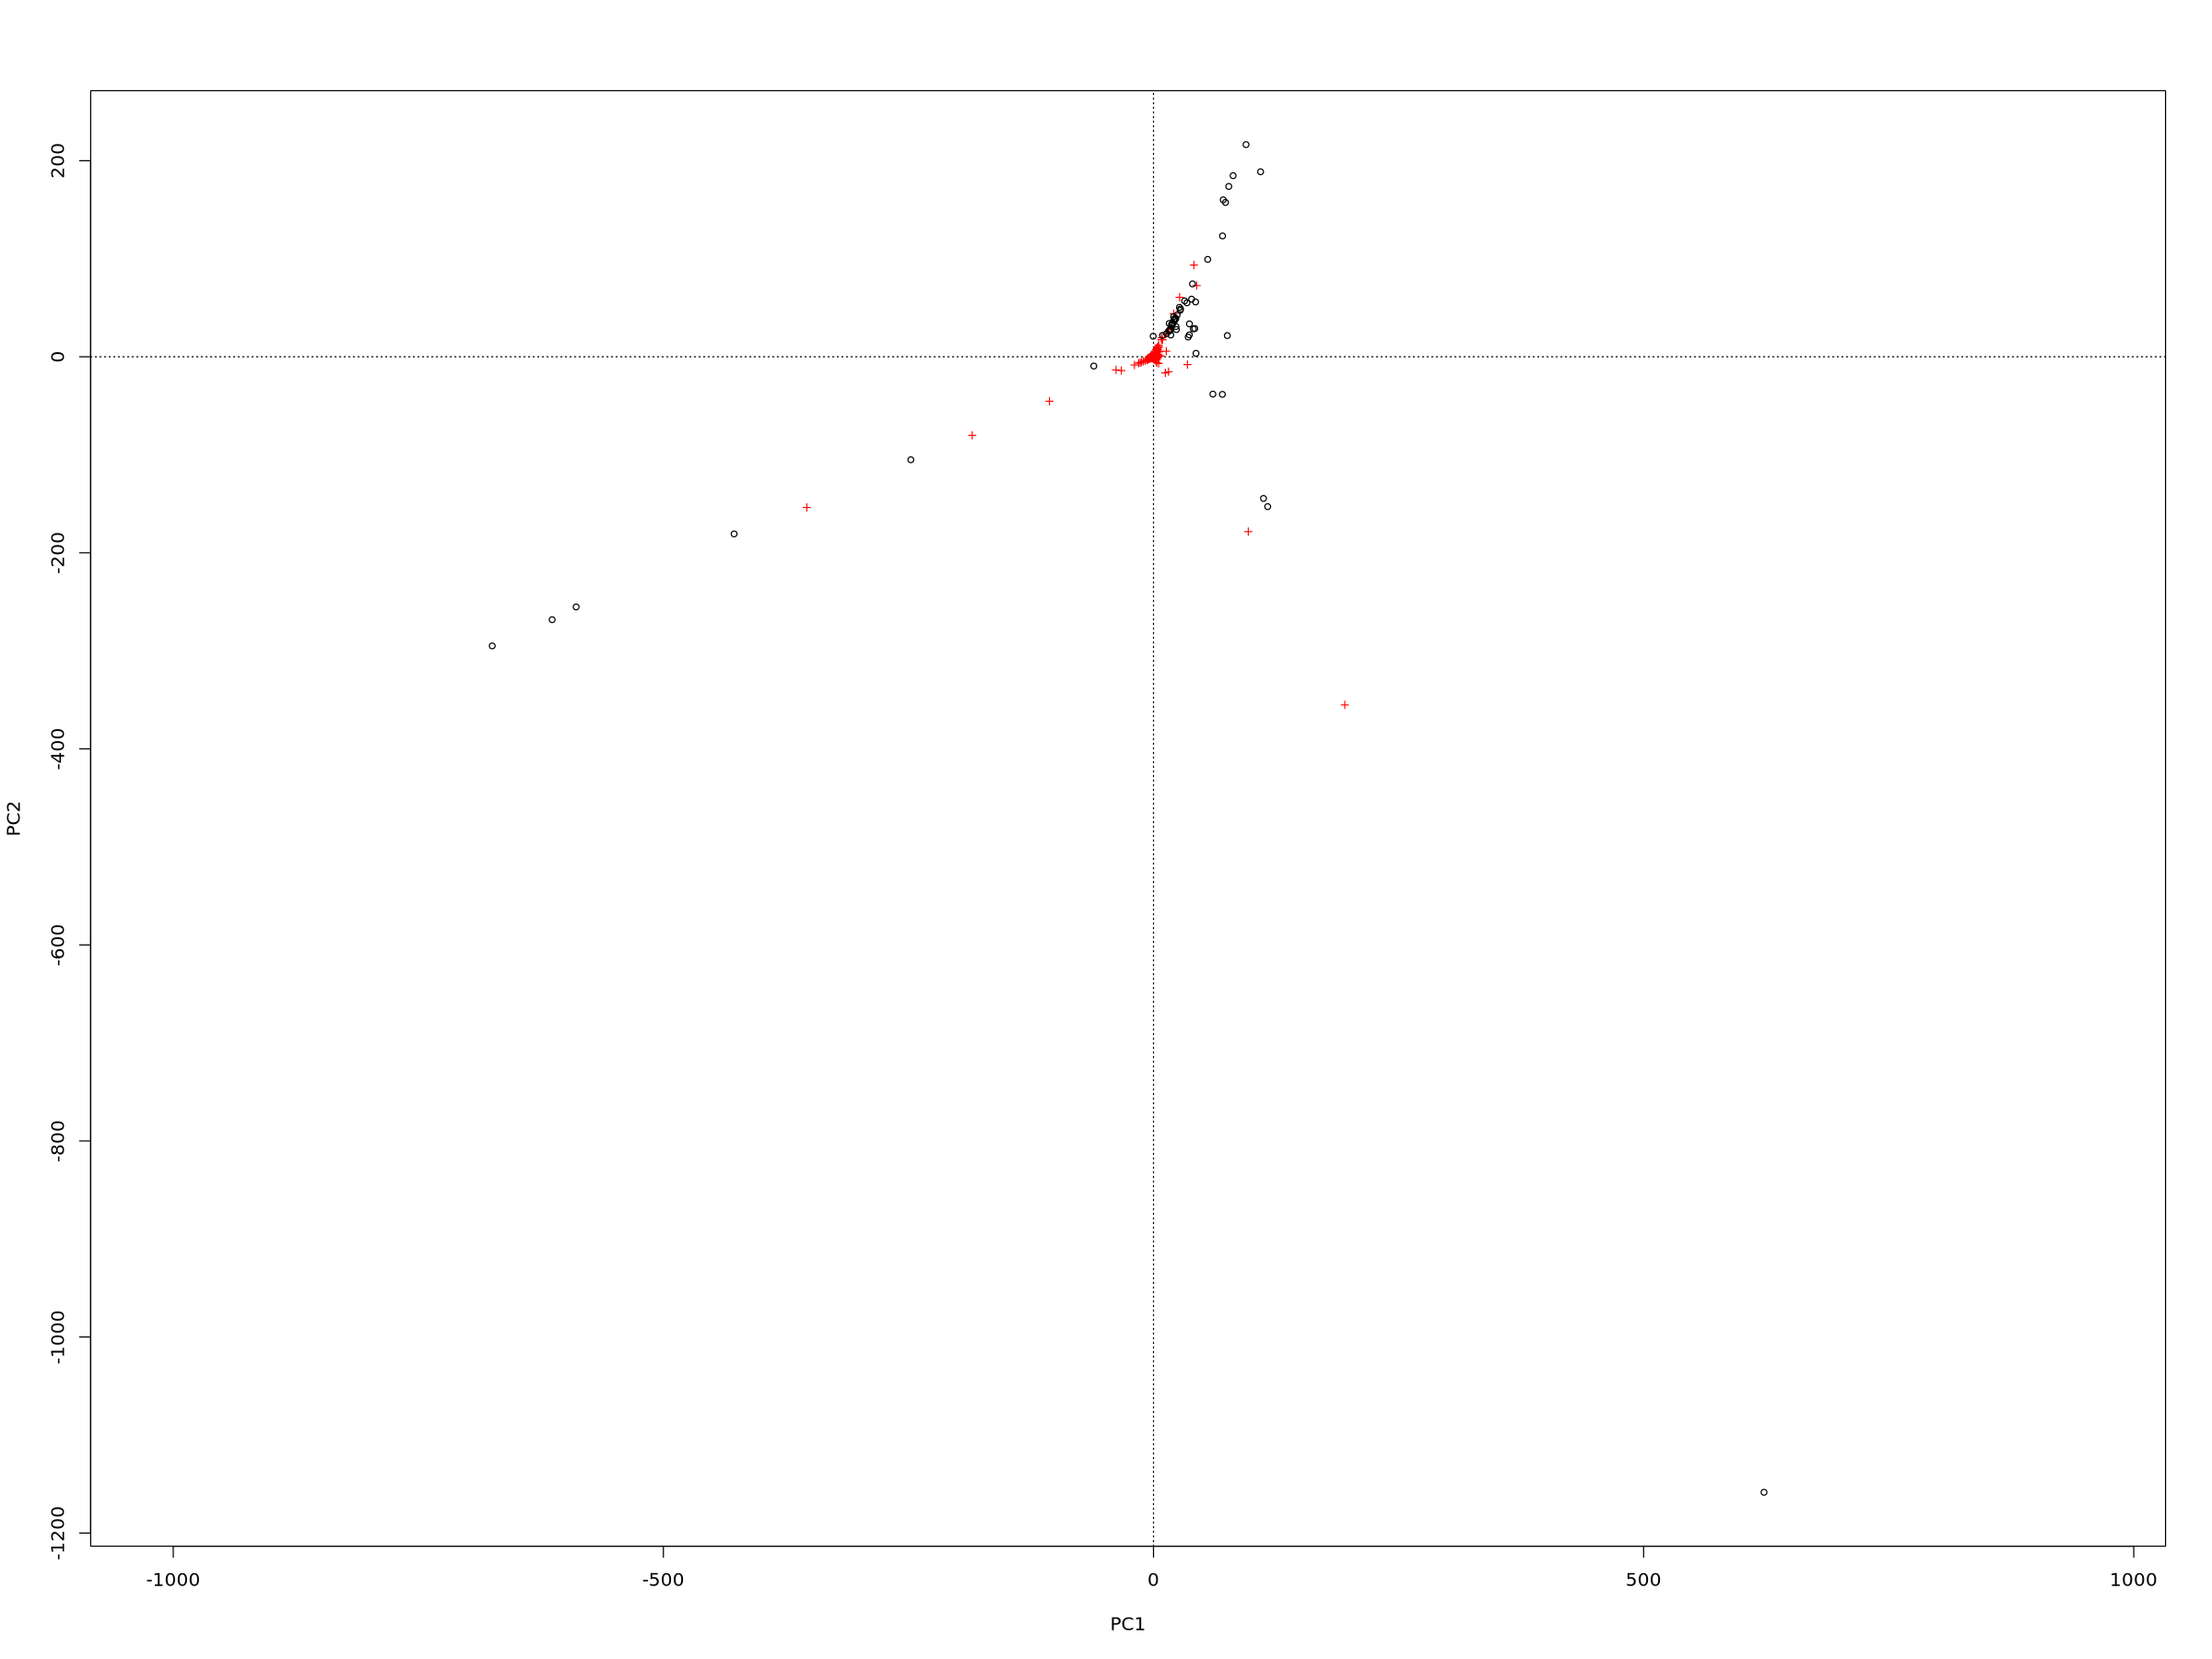

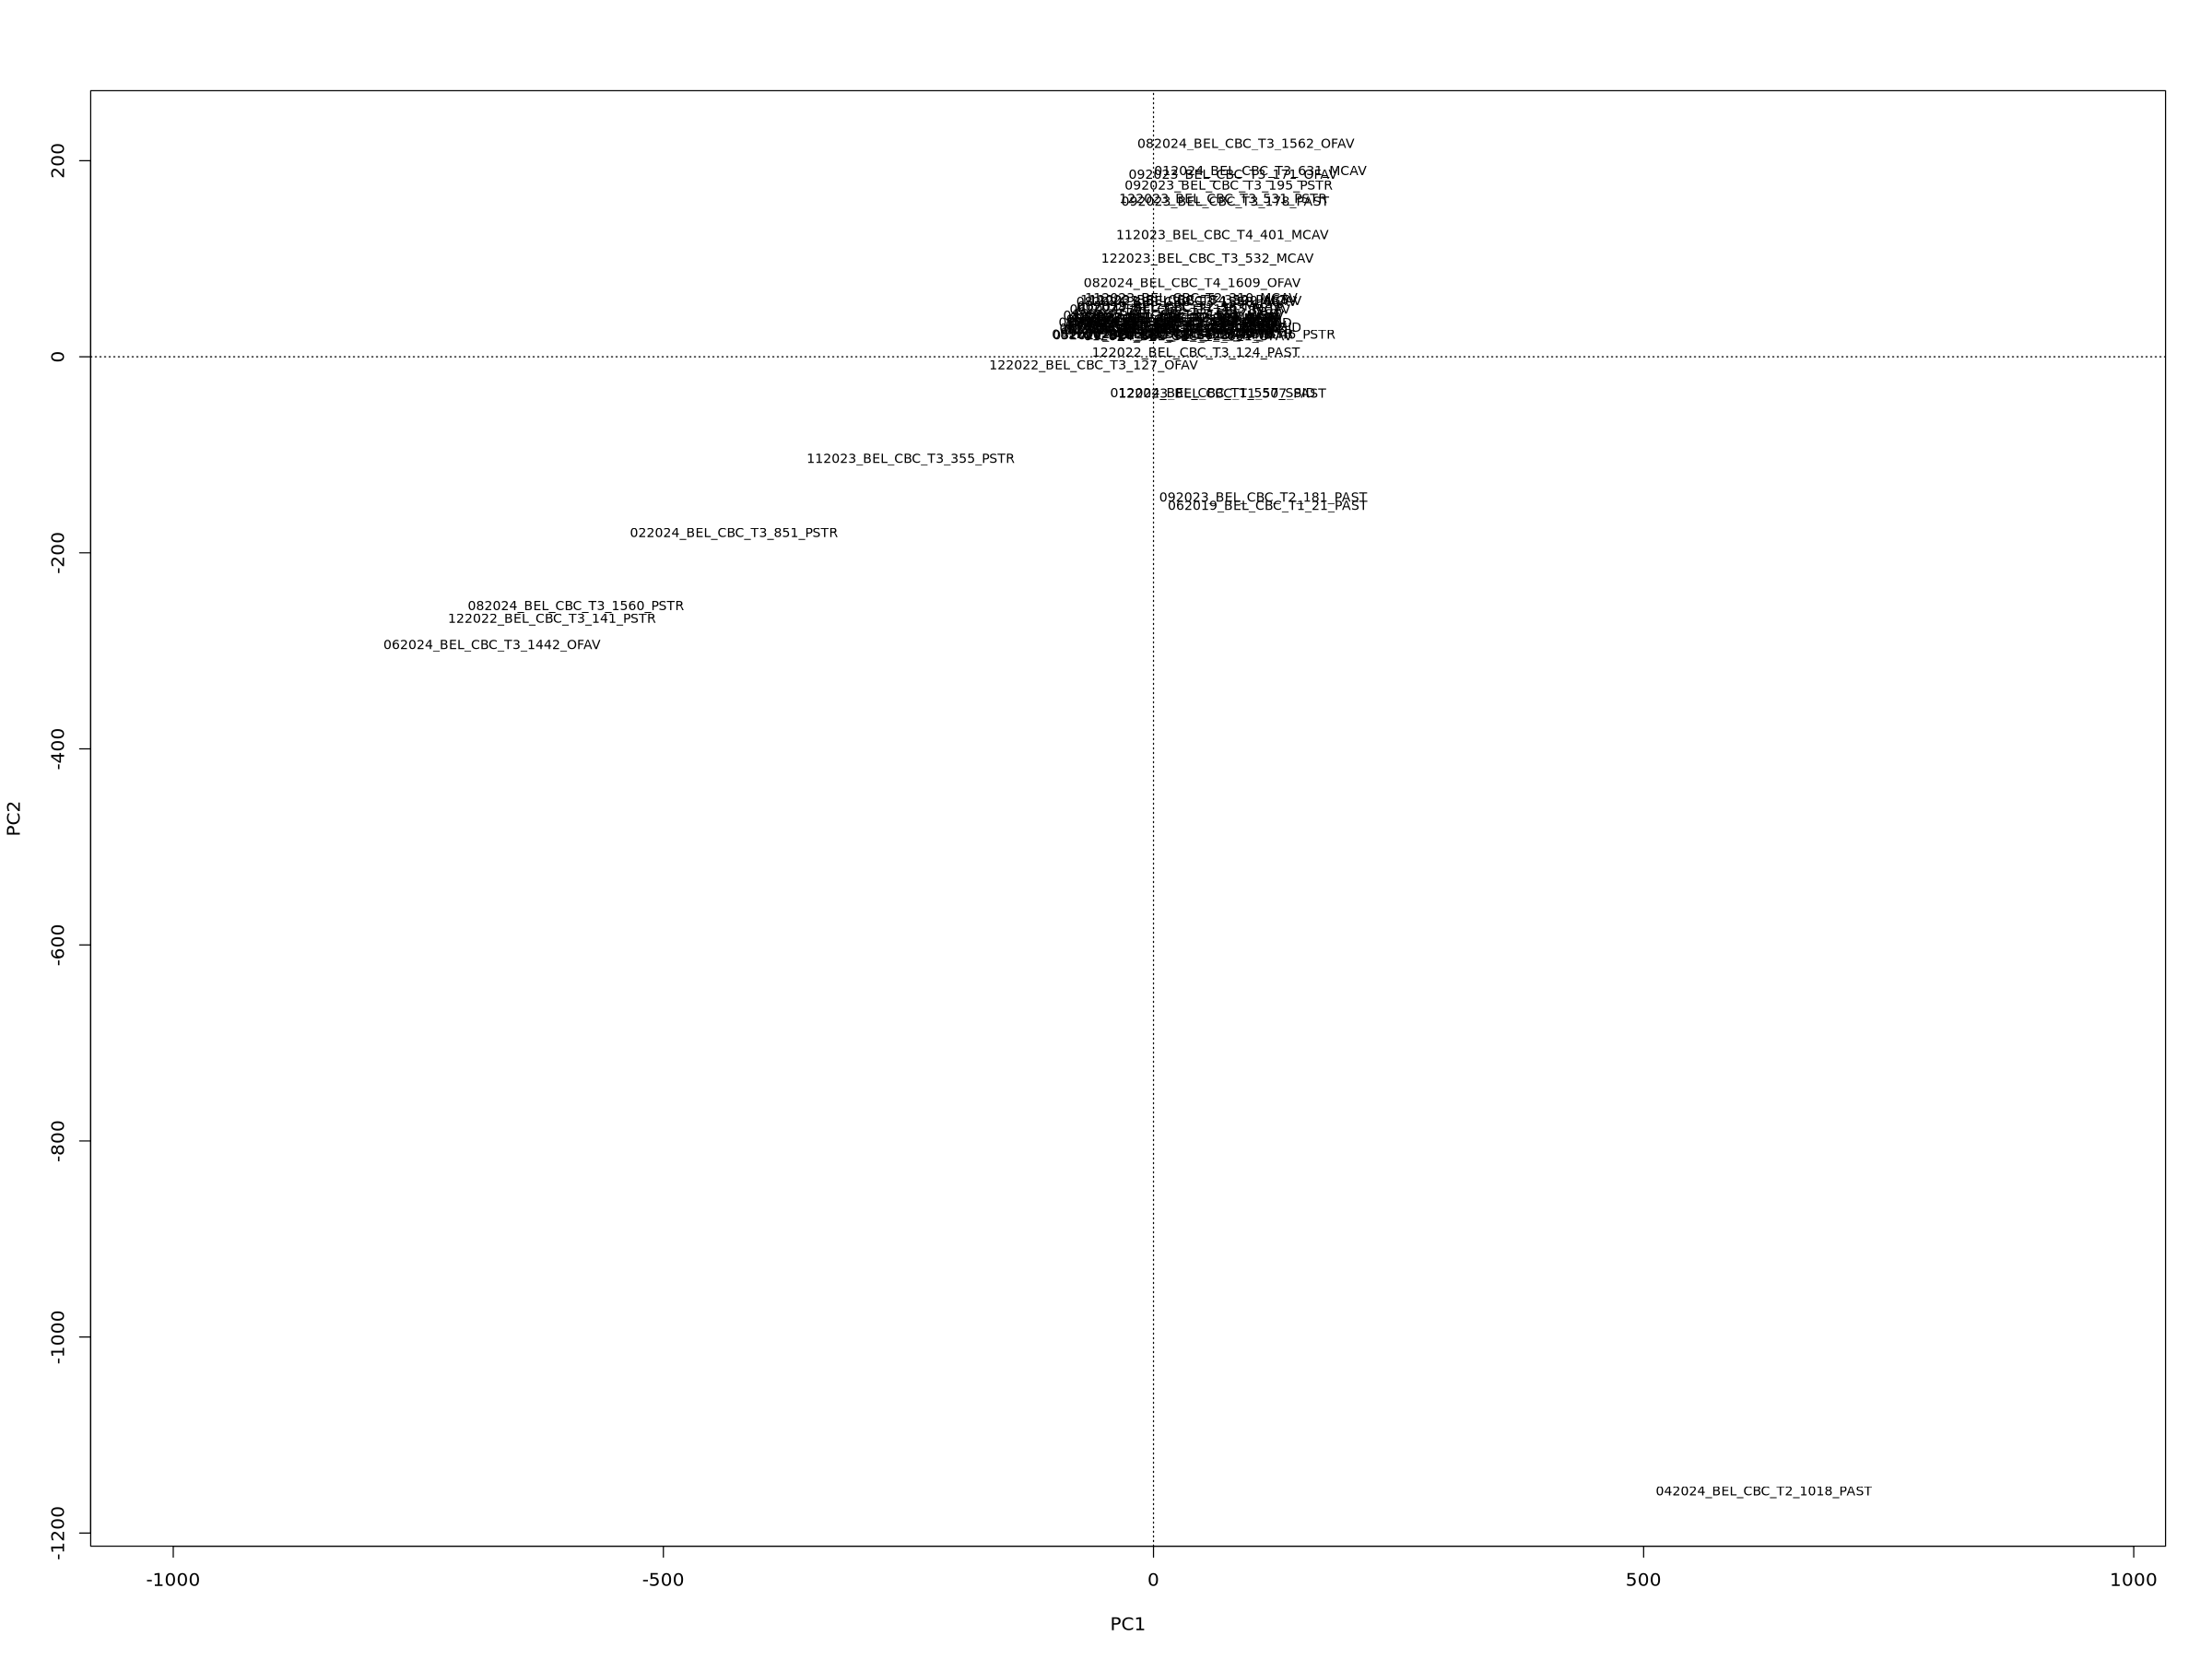

In [24]:
# Now, we`ll plot our results with the plot function
plot(PCA, display = "sites", type = "text")
#in this case sites are samples, why am I not seeing clustsering like with nmds

# Correspondence Analysis using vegan

# what does kmeans actually do?

#This number of clusters should be determined according to the context and goal of your analysis (so according to your expectations or hypotheses)
model <- kmeans(otu_norm, centers = 2)

#The output model$cluster specifies the group (i.e., 1 or 2) to which each sample belongs to.
print(model$cluster)

calculate dissimilarity between samples using PERMANOVA in vegan

# df=n-1 

In [26]:
# variables with no interaction
adonis2(vegdist(otu_norm, method = "bray") ~ species + transect + date + double_band, data = sample_norm)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
species,5,3.9831860,0.15285356,1.8698214,0.001
transect,3,1.6302146,0.06255899,1.2754489,0.015
date,10,4.2151830,0.16175637,0.9893637,0.553
double_band,1,0.4664077,0.01789826,1.0947257,0.277
Residual,37,15.7638456,0.60493282,NA,NA
Total,56,26.0588368,1.00000000,NA,NA


In [ ]:
#variables with 2-way and 3- way interaction
adonis2(vegdist(otu_norm, method = "bray") ~ species * transect * Date_16S, data = sample_norm)

this specific code tests how much of the variation in Bray-Curtis distances can be explained by the combination of Experiment and Species, treating Species as nested within Experiment.
#adonis2(vegdist(otu_norm, method="bray") ~ Experiment/Species, data=sample_norm)


In [27]:
#variables nested within eachother
#this one is species within transect with date as another variable
adonis2(vegdist(otu_norm, method = "bray") ~ Date_16S/species + date, data = sample_norm)


,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Date_16S,5,4.763527,0.1827989,3.191087,0.001
date,10,4.235814,0.1625481,1.418786,0.001
Date_16S:species,23,11.685559,0.4484298,1.701773,0.001
Residual,18,5.373937,0.2062232,NA,NA
Total,56,26.058837,1.0000000,NA,NA


In [ ]:
ps_norm_bac_glom=tax_glom(ps_norm_bac, taxrank

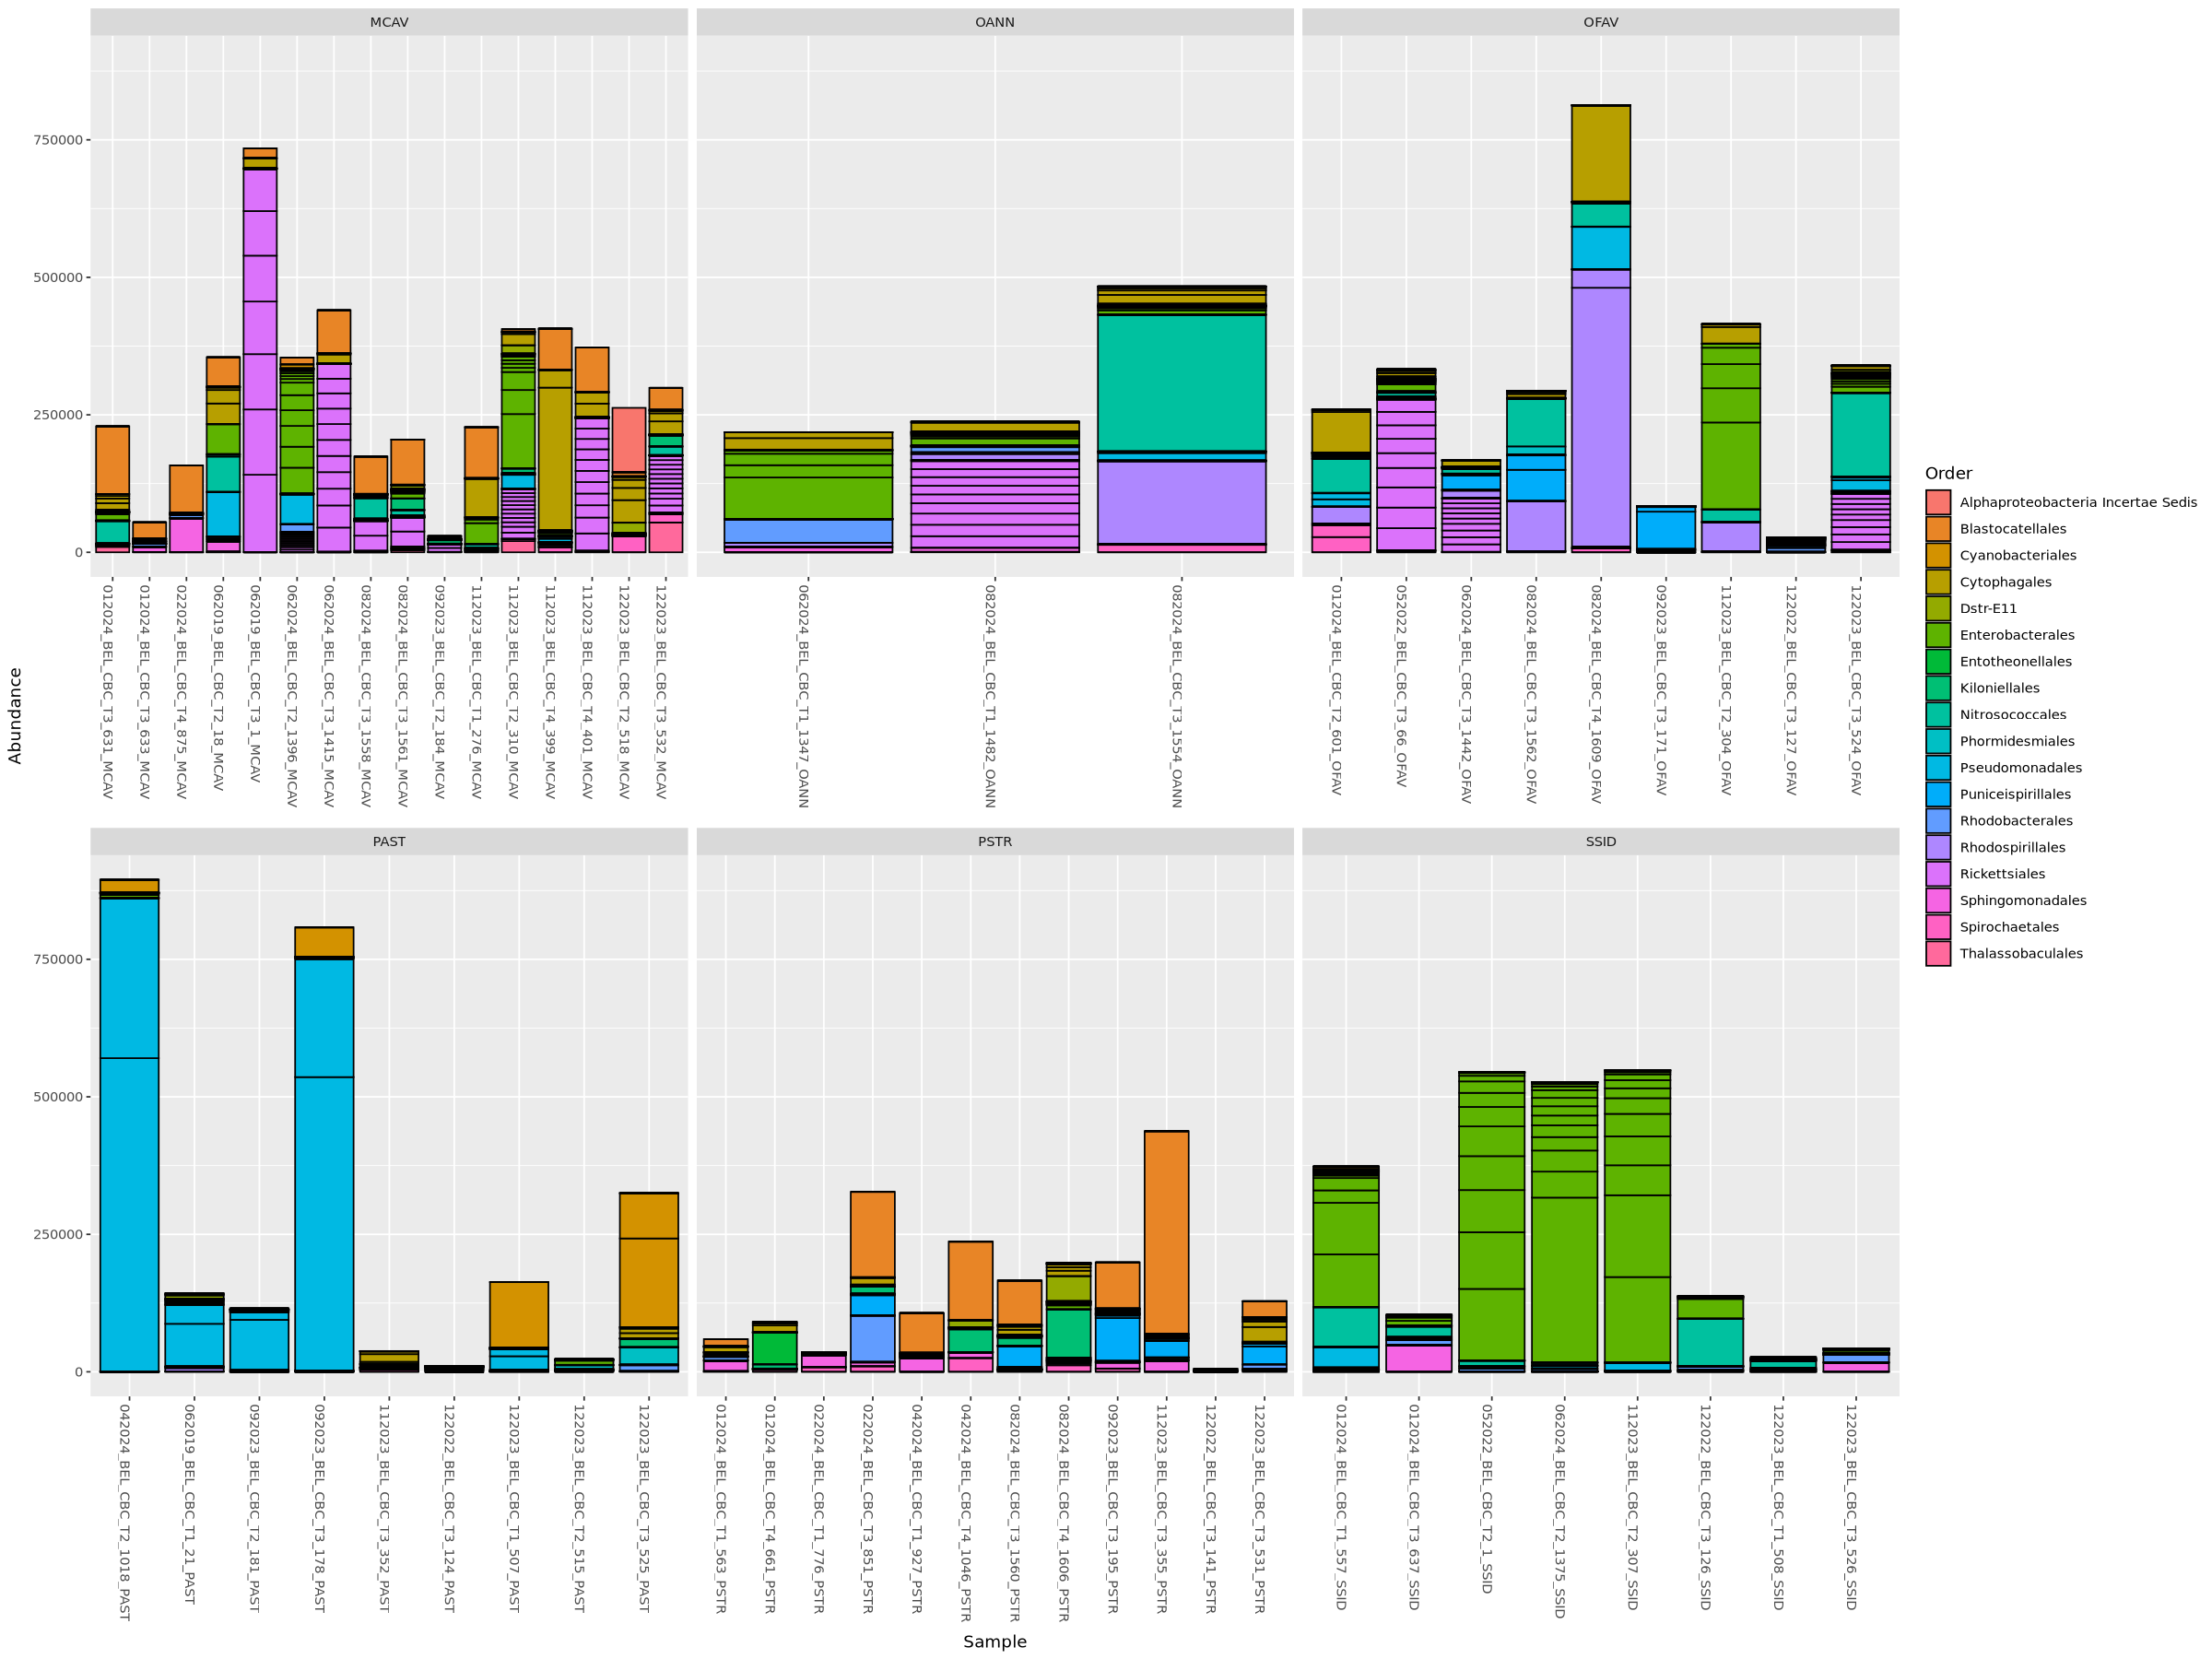

In [27]:
#plot after removing chloroplast
top100 <- names(sort(taxa_sums(ps_norm_nochlo), decreasing=TRUE))[1:100] 
#ps.top20 <- transform_sample_counts(ps_norm, function(OTU) OTU/sum(OTU)) 
ps.top100 <- prune_taxa(top100, ps_norm_nochlo) 
plot_bar(ps.top100, fill="Order") + facet_wrap(~species, scales="free_x")